In [10]:
import numpy as np
from matplotlib import pyplot as plt
#plt.rcParams['font.family'] = 'sans-serif' 
plt.rcParams['font.family'] = ['serif']
plt.rcParams['font.serif'] = ['Times New Roman']

import torch
from tqdm import trange,tqdm
import seaborn as sns
sns.set_theme()

In [3]:
import sys
sys.path.append('../ByzLibrary')
from robust_aggregators import RobustAggregator
from byz_attacks import ByzantineAttack

In [7]:
lams = np.linspace(0,1,200)

In [4]:
def theoretic(n,f,m,sigma,sigma_client):
    kappa = f/(n-2*f)
    A = sigma_client**2
    c= n-f
    for mu_c in range(int(c)):
        A+= kappa/c*(sigma_client)**2
    return (1-1/(n-f) ) *(sigma**2) / ( (kappa*(n-f-1)/(n-f) + 1-1/(n-f)) *(sigma**2)  +A**2) 

In [5]:
def heterogeneous_exp_main_n_exp(n,f,m,sigma, mu_true, sigma_clients, n_exp=20):
        
    results_list = []  # of shape len(sigma_clients) * 200
    variance_list = []
    np.random.seed(0)
    seeds = np.random.randint(0,10000, n_exp)
    for sigma_client in tqdm(sigma_clients):
        avg_results = []   # of length 200
        for seed in seeds:
            np.random.seed(seed)
            mu_clients = np.random.randn(n-f,1)*sigma_client + mu_true # Each honest client has different mean 
            aggregation_rule = RobustAggregator('nnm', 'trmean', 1, n, f, 0, 1, 'cpu')
            attack = ByzantineAttack("SF", f, 1, 'cpu', learning_phase = 0, gradient_clip = 1, robust_aggregator = aggregation_rule)

            X_honest = np.random.randn(n-f, m)*sigma+mu_clients
            X_h = torch.Tensor(X_honest)
            X_h = list(X_h)
            X_byzantine = attack.generate_byzantine_vectors(X_h, None, 1)
            #X_byzantine = np.random.randn(f,m)*sigma_biz + mu_biz
            X = X_byzantine + X_h
            A = list(torch.stack(X).mean(1).unsqueeze(1))
            pu_pred = aggregation_rule.aggregate(A).mean()
            #pu_pred = aggregation_rule.aggregate(X).mean()
            results = []
            
            results = np.abs((1-lams) * X[-1].mean().item() + lams* pu_pred.item() - mu_clients[-1])**2   
            avg_results.append(results)
        avg_results = np.array(avg_results).mean(0)
        results_list.append(avg_results)
        var = np.array(avg_results).std(0)
        variance_list.append(var)
    #return results_list    
    return results_list, variance_list
def sigma_exp_main_n_exp(n,f,m,sigma_list,mu_true,sigma_client,n_exp=20):
        
    results_list = []  # of shape len(sigma_clients) * 200
    variance_list = []
    np.random.seed(0)
    seeds = np.random.randint(0,10000, n_exp)
    for sigma in tqdm(sigma_list):
        avg_results = []   # of length 200
        for seed in seeds:
            np.random.seed(seed)
            mu_clients = np.random.randn(n-f,1)*sigma_client + mu_true # Each honest client has different mean 
            aggregation_rule = RobustAggregator('nnm', 'trmean', 1, n, f, 0, 1, 'cpu')
            attack = ByzantineAttack("SF", f, 1, 'cpu', learning_phase = 0, gradient_clip = 1, robust_aggregator = aggregation_rule)

            X_honest = np.random.randn(n-f, m)*sigma+mu_clients
            X_h = torch.Tensor(X_honest)
            X_h = list(X_h)
            X_byzantine = attack.generate_byzantine_vectors(X_h, None, 1)
            #X_byzantine = np.random.randn(f,m)*sigma_biz + mu_biz
            X = X_byzantine + X_h
            A = list(torch.stack(X).mean(1).unsqueeze(1))
            pu_pred = aggregation_rule.aggregate(A).mean()
            #pu_pred = aggregation_rule.aggregate(X).mean()
            results = []
            
            results = np.abs((1-lams) * X[-1].mean().item() + lams* pu_pred.item() - mu_clients[-1])**2   
            avg_results.append(results)
        avg_results = np.array(avg_results).mean(0) 
        results_list.append(avg_results)
        var = np.array(avg_results).std(0)
        variance_list.append(var)
    #return results_list    
    return results_list, variance_list
    
def byz_exp_main_n_exp(n,f_list,m,sigma,mu_true,sigma_client,n_exp=20):
        
    results_list = []  # of shape len(sigma_clients) * 200
    variance_list = []
    np.random.seed(0)
    seeds = np.random.randint(0,10000, n_exp)
    for f in tqdm(f_list):
        avg_results = []   # of length 200
        for seed in seeds:
            np.random.seed(seed)
            mu_clients = np.random.randn(n,1)*sigma_client + mu_true # Each honest client has different mean 
            aggregation_rule = RobustAggregator('nnm', 'trmean', 1, n, f, 0, 1, 'cpu')
            attack = ByzantineAttack("SF", f, 1, 'cpu', learning_phase = 0, gradient_clip = 1, robust_aggregator = aggregation_rule)

            X_honest = np.random.randn(n, m)*sigma+mu_clients
            X_h = torch.Tensor(X_honest)
            X_h = list(X_h)
            X_byzantine = attack.generate_byzantine_vectors(X_h, None, 1)
            #X_byzantine = np.random.randn(f,m)*sigma_biz + mu_biz
            X = X_byzantine + X_h
            A = list(torch.stack(X).mean(1).unsqueeze(1))
            pu_pred = aggregation_rule.aggregate(A).mean()
            #pu_pred = aggregation_rule.aggregate(X).mean()
            
            results = np.abs((1-lams) * X[-1].mean().item() + lams* pu_pred.item() - mu_clients[-1])**2   
            avg_results.append(results)
        avg_results = np.array(avg_results).mean(0) 
        results_list.append(avg_results)
        var = np.array(avg_results).std(0)
        variance_list.append(var)
    #return results_list    
    return results_list, variance_list
    
    
def m_exp_main_n_exp(n,f,m_list,sigma,mu_true,sigma_client,n_exp=20):
        
    results_list = []  # of shape len(sigma_clients) * 200
    np.random.seed(0)
    seeds = np.random.randint(0,10000, n_exp)
    for m in tqdm(m_list):
        avg_results = []   # of length 200
        for seed in seeds:
            np.random.seed(seed)
            mu_clients = np.random.randn(n-f,1)*sigma_client + mu_true # Each honest client has different mean 
            aggregation_rule = RobustAggregator('nnm', 'trmean', 1, n, f, 0, 1, 'cpu')
            attack = ByzantineAttack("SF", f, 1, 'cpu', learning_phase = 0, gradient_clip = 1, robust_aggregator = aggregation_rule)

            X_honest = np.random.randn(n-f, m)*sigma+mu_clients
            X_h = torch.Tensor(X_honest)
            X_h = list(X_h)
            X_byzantine = attack.generate_byzantine_vectors(X_h, None, 1)
            #X_byzantine = np.random.randn(f,m)*sigma_biz + mu_biz
            X = X_byzantine + X_h
            A = list(torch.stack(X).mean(1).unsqueeze(1))
            pu_pred = aggregation_rule.aggregate(A).mean()
            #pu_pred = aggregation_rule.aggregate(X).mean()
            results = []
            
            results = np.abs((1-lams) * X[-1].mean().item() + lams* pu_pred.item() - mu_clients[-1])**2   
            avg_results.append(results)
        avg_results = np.array(avg_results).mean(0) 
        results_list.append(avg_results)
    return results_list

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 11/11 [00:03<00:00,  3.31it/s]
/tmp/ipykernel_569643/1135082492.py:2: RuntimeWarning: divide by zero encountered in scalar divide
  kappa = f/(n-2*f)
100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 11/11 [00:02<00:00,  3.82it/s]


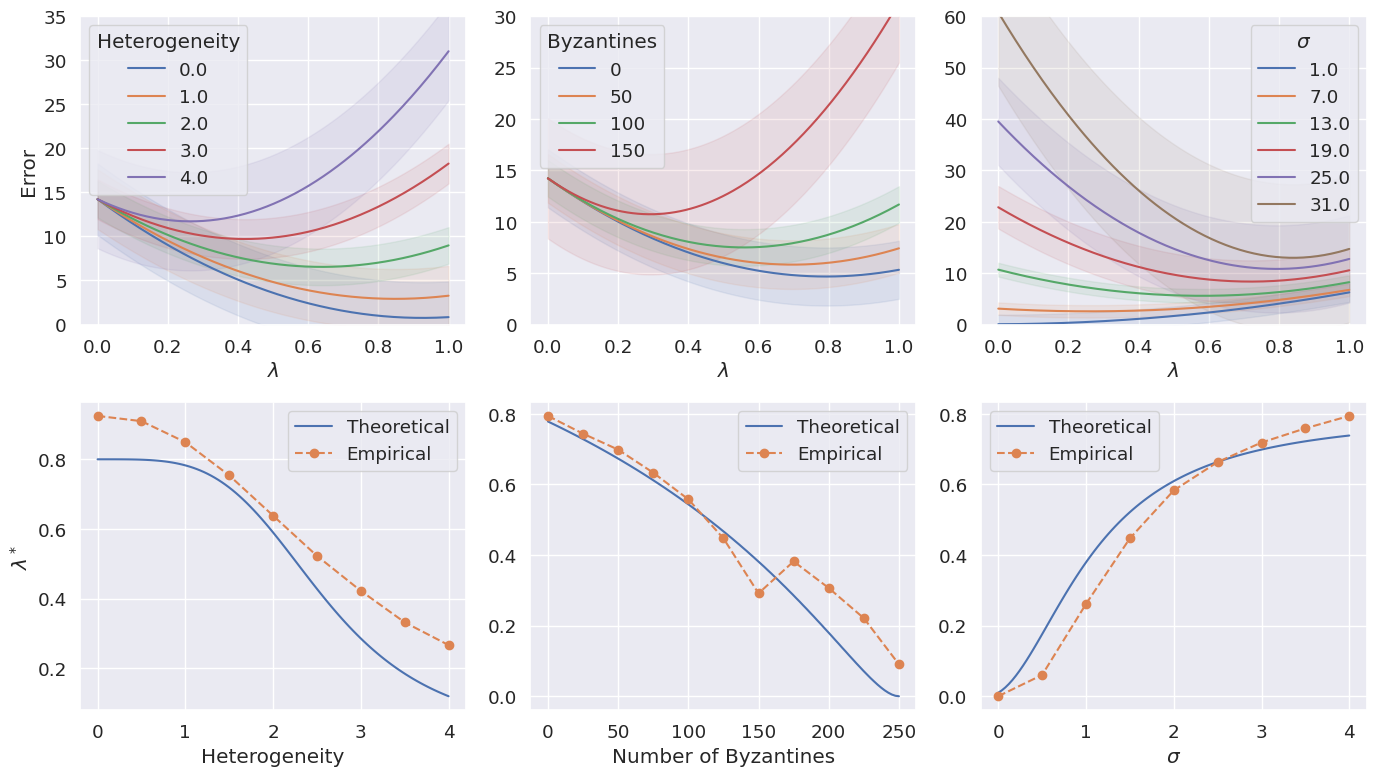

In [22]:
sns.set(font_scale=1.2)
sigma_clients = np.linspace(0,4,9)# [0,1,2,3,4]
fig,ax = plt.subplots(2,3,figsize=(14,8))
f = 100
m = 20
sigma= 15
results_list,var_list = heterogeneous_exp_main_n_exp(n=600, f=f, m=m ,sigma=sigma, mu_true=10, sigma_clients=sigma_clients)
for j in range(0,9,2):
    ax[0,0].plot(lams, results_list[j], label= sigma_clients[j])
    color = ax[0,0].lines[-1].get_color()
    ci = 1.96 * var_list[j]/np.sqrt(20)
    ax[0,0].fill_between(lams, (results_list[j]-var_list[j]), (results_list[j]+var_list[j]), color=color, alpha=.1)
    #ax[0,0].errorbar(lams, results_list[j], var_list[j],errorevery=(40+j),label= sigma_clients[j])
    color = ax[0,0].lines[-1].get_color()
    #ax[0].axvline(theoretic(600,f,m,sigma,np.sqrt(2)*sigma_clients[j]), color = color, ls='--')
ax[0,0].set_xlabel(r"$\lambda$")
ax[0,0].set_ylabel("Error")
ax[0,0].legend(title="Heterogeneity")

ax[0,0].set_ylim([0,35])
#plt.savefig("experiments/heterogeneity_byz_600_20_20_10.png")
sigma_clients_ = np.linspace(0,4,100)
lam_star = [theoretic(600,100,20,15,np.sqrt(2)*sigma_client) for sigma_client in sigma_clients_]
lam_star_practice = [lams[np.argmin(results_list[j])] for j in range(len(sigma_clients))]
ax[1,0].plot(sigma_clients_, lam_star, label ="Theoretical")
ax[1,0].plot(sigma_clients, lam_star_practice, 'o--', label="Empirical")
ax[1,0].set_xlabel("Heterogeneity")
ax[1,0].set_ylabel(r"$\lambda^*$")
ax[1,0].legend()
#fig.suptitle(f" n = {n}, f = {f}") # (f" f/n = {f/(600+f):.2f} ")
#plt.savefig("experiments/het_lam_star.png")

f_list = np.linspace(0,250,11, dtype=int) # [0,1,2,3,4]
#fig,ax = plt.subplots(1,2,figsize=(12,5))
m = 20
sigma= 15
n=500
sigma_h = 2
results_list,var_list = byz_exp_main_n_exp(n=n, f_list=f_list, m=m ,sigma=sigma, mu_true=10, sigma_client=sigma_h, n_exp=20)
for j in range(0,8,2):
    ax[0,1].plot(lams, results_list[j], label= f_list[j])
    color = ax[0,1].lines[-1].get_color()
    ci = 1.96 * var_list[j]/np.sqrt(20)
    ax[0,1].fill_between(lams, (results_list[j]-var_list[j]), (results_list[j]+var_list[j]), color=color, alpha=.1)
    #ax[0,1].errorbar(lams, results_list[j], var_list[j],errorevery=(40+j),label= f_list[j])
    color = ax[0,1].lines[-1].get_color()
    #ax[0].axvline(theoretic(n,f_list[j],m,sigma,np.sqrt(2)*sigma_h), color = color, ls='--')
ax[0,1].set_xlabel(r"$\lambda$")
#ax[0,1].set_ylabel("Error")
ax[0,1].legend(title="Byzantines")

ax[0,1].set_ylim([0,30])
#plt.savefig("experiments/heterogeneity_byz_600_20_20_10.png")
f_list_ = np.linspace(0,250,100)
lam_star = [theoretic(n,f,20,15,np.sqrt(2)*sigma_h) for f in f_list_]
lam_star_practice = [lams[np.argmin(results_list[j])] for j in range(len(f_list))]
ax[1,1].plot(f_list_, lam_star, label ="Theoretical")
ax[1,1].plot(f_list, lam_star_practice, 'o--', label="Empirical")
ax[1,1].set_xlabel("Number of Byzantines")
#ax[1,1].set_ylabel(r"$\lambda^*$")
ax[1,1].legend()
#fig.suptitle(f" n = {n}, f = {f}") # (f" f/n = {f/(600+f):.2f} ")
#plt.savefig("experiments/byz_lam_star.png")


sigma_list = np.linspace(1,31,11)# [0,1,2,3,4] [
#fig,ax = plt.subplots(1,2,figsize=(12,5))
f = 100
m = 20

results_list,var_list= sigma_exp_main_n_exp(n=600, f=f, m=m ,sigma_list=sigma_list, mu_true=10, sigma_client=2)
for j in range(0,11,2):
    ax[0,2].plot(lams, results_list[j], label= sigma_list[j])
    color = ax[0,2].lines[-1].get_color()
    ci = 1.96 * var_list[j]/np.sqrt(20)
    ax[0,2].fill_between(lams, (results_list[j]-var_list[j]), (results_list[j]+var_list[j]), color=color, alpha=.1)
    #ax[0,2].errorbar(lams, results_list[j], var_list[j],errorevery=(40+j),label= sigma_list[j])
    color = ax[0,2].lines[-1].get_color()
    #ax[0].axvline(theoretic(600,f,m,sigma_list[j],np.sqrt(2)*2), color = color, ls='--')
ax[0,2].set_xlabel(r"$\lambda$")
#ax[0,2].set_ylabel("Error")
ax[0,2].legend(title=r"$\sigma$")

ax[0,2].set_ylim([0,60])
#plt.savefig("experiments/heterogeneity_byz_600_20_20_10.png")
sigma_list_ = np.linspace(1,31,100)
lam_star = [theoretic(600,100,20,sigma,np.sqrt(2)*2) for sigma in sigma_list_]
lam_star_practice = [lams[np.argmin(results_list[j])] for j in range(len(sigma_clients))]
ax[1,2].plot(sigma_clients_, lam_star, label ="Theoretical")
ax[1,2].plot(sigma_clients, lam_star_practice, 'o--', label="Empirical")
ax[1,2].set_xlabel(r"$\sigma$")
#ax[1,2].set_ylabel(r"$\lambda^*$")
ax[1,2].legend()
#fig.suptitle(f" n = {n}, f = {f}") # (f" f/n = {f/(600+f):.2f} ")
plt.savefig("../experiments/three_exp_with_error_bar.png")
plt.show()
